In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# **Stage 1: Data Cleaning**

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [5]:
df.head(20)

Unnamed: 0                track_id                               artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1            1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2            2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3            3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4            4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5            5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6            6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7            7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8            8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9            9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   
10          10  4mzP5mHkRvGxdhdGdAH7EJ                          Zack Tabudlo   
11          11  5ivF4eQBqJiVL5IAE9jRyl                            Jason Mraz   
12          12  4ptDJbJl35d7gQfeNteBwp                              Dan Berk   
13          13  0X9MxHR1rTkEHDjp95F2OO                         Anna Hamilton   
14          14  4LbWtBkN82ZRhz9jqzgrb3              Chord Overstreet;Deepend   
15          15  1KHdq8NK9QxnGjdXb55NiG                           Landon Pigg   
16          16  6xKeQgzfjixSUld14qUezm                  Andrew Foy;Renee Foy   
17          17  4Yo0igmcoNyat1secaH0OD                  Andrew Foy;Renee Foy   
18          18  2qLMf6TuEC3ruGJg4SMMN6             Jason Mraz;Colbie Caillat   
19          19  6CgNoAbFJ4Q4Id4EjtbXlC               Boyce Avenue;Bea Miller   

                                           album_name  \
0                                              Comedy   
1                                    Ghost (Acoustic)   
2                                      To Begin Again   
3   Crazy Rich Asians (Original Motion Picture Sou...   
4                                             Hold On   
5                                Days I Will Remember   
6                         Is There Anybody Out There?   
7                 We Sing. We Dance. We Steal Things.   
8                 We Sing. We Dance. We Steal Things.   
9                                              Hunger   
10                                            Episode   
11                         Love Is a Four Letter Word   
12                                               Solo   
13                                           Bad Liar   
14                                    Hold On (Remix)   
15                                  The Boy Who Never   
16                              ily (i love you baby)   
17                                        At My Worst   
18                We Sing. We Dance. We Steal Things.   
19                             Cover Sessions, Vol. 4   

                          track_name  popularity  duration_ms  explicit  \
0                             Comedy          73       230666     False   
1                   Ghost - Acoustic          55       149610     False   
2                     To Begin Again          57       210826     False   
3         Can't Help Falling In Love          71       201933     False   
4                            Hold On          82       198853     False   
5               Days I Will Remember          58       214240     False   
6                      Say Something          74       229400     False   
7                          I'm Yours          80       242946     False   
8                              Lucky          74       189613     False   
9                             Hunger          56       205594     False   
10              Give Me Your Forever          74       244800     False   
11                   I Won't Give Up          69       240165     False   
12                              Solo          52       198712     False   
13                          Bad Liar          62       248448     False   


In [6]:
#Data Checking
df.sample(20)

Unnamed: 0                track_id             artists  \
57408        57408  0I1eFRytp4XRhLCjT6tZm7                Roar   
107771      107771  2IIDtdJkLHGW1p53GR7xZs                Kite   
95453        95453  2VgVgYzM2f3OTwiuH5C9rP          Maelo Ruiz   
43584        43584  7CUMdvuEVT4UvQAh3rDPtD              Kemuel   
58616        58616  7pypsyGCvT5yUKXuUuXc3Z         Celldweller   
90148        90148  51FpZbIYAtkWtbFzZVLxUk      Wilson Pickett   
20688        20688  61tnfFfea71XruDZadOUmu         Wiz Khalifa   
2921          2921  0jwIgZRcbW2VjYuCbhKnX5  Ratones Paranoicos   
7043          7043  1R1XNbZDIDEDCi4Y16eNQn  The Wailin' Jennys   
74696        74696  7m74gDDWJmNjL1rUcWReuH      Barão Vermelho   
73193        73193  7wWXKqpLayBT6dZkeiMSle         Moonbootica   
46787        46787  1jFbp77CidbGGd5MKV8M0H             Scooter   
98713        98713  3i0J9e00YhlrKO7AqgdO8Z      Jessie Mueller   
95276        95276  4TKqIJa1LtoJ2wlmOOrB9w         Yan Collazo   
14937        14937  7ImvgDdmUPntMJY9jw9pzg  The Countdown Kids   
108219      108219  6P3zkrGmoNDZ0hYaPgFoLn    Francisco Lomuto   
82866        82866  04ILadtH6a83MZ8rAsk9TS          Superchunk   
39957        39957  7sJNeWTXkZCEC7OnFMpGWL   Luciano;Aitch;BIA   
13968        13968  5j5ZvLw4BUd69b0XBRuKVk        Paul Johnson   
57617        57617  2W779g2UrRZtVdf3FcEOO1           Lyn Lapid   

                                          album_name  \
57408                          I Can't Handle Change   
107771                                             V   
95453                                           Solo   
43584                                      Clássicos   
58616                   Celldweller (Deluxe Edition)   
90148                             Thanksgiving Party   
20688                                        Rap Ice   
2921                                Fieras Lunaticas   
7043                                         40 Days   
74696                                     Balada MTV   
73193    Ibiza Techno Top 50 : 2022. 2 - the Closing   
46787                                   Mind the Gap   
98713                            She Used to Be Mine   
95276                                    La Película   
14937   Happy Halloween! (Spooky Favorites for Kids)   
108219               The Roots of Tango - Nostalgias   
82866                                Wild Loneliness   
39957                                       Majestic   
13968                                   Bump Talkin'   
57617                                     In My Mind   

                        track_name  popularity  duration_ms  explicit  \
57408        I Can't Handle Change          80       198213     False   
107771              If You Want Me          23       255920     False   
95453              Apasionadamente          30       277266     False   
43584   Leva Me a Ti (Bônus Pista)          27       317728     False   
58616             Own Little World          47       213240     False   
90148         In the Midnight Hour           0       157160     False   
20688                    Still Wiz           0       170987     False   
2921                       La Nave          45       223946     False   
7043                     Arlington          37       294160     False   
74696      Eu queria ter uma bomba          41       193600     False   
73193                     Say More           0       341670     False   
46787    Jigga Jigga! - Radio Edit          17       232999     False   
98713          She Used to Be Mine          54       260573     False   
95276                  La Película          33       257648     False   
14937            This Is Halloween           0       196000     False   
108219                  Nostalgias          22       184495     False   
82866              Wild Loneliness          20       183253     False   
39957    Bamba (feat. Aitch & BIA)          75       203560     False   
13968                    Fantasise           6       3266

In [7]:
df.shape

(114000, 21)

In [8]:
len(df["track_id"].unique())

89741

In [9]:
#Check for duplicates (there are duplicates)
duplicate_track_count = df.shape[0] - len(df["track_id"].unique())
print(f"Number of duplicate track IDs: {duplicate_track_count}")


Number of duplicate track IDs: 24259


In [10]:
track_id_counts = df.groupby('track_id')['track_id'].count()
duplicate_track_ids = track_id_counts[track_id_counts > 1]
print(duplicate_track_ids)


track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64


In [11]:
df.select_dtypes('number').describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

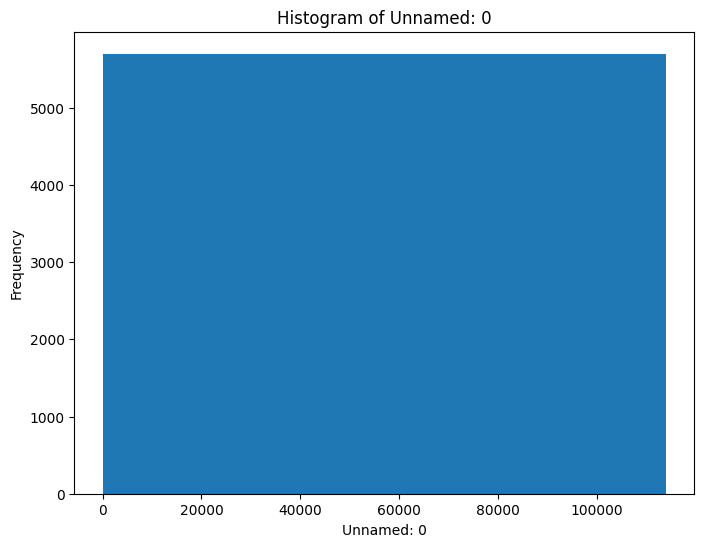

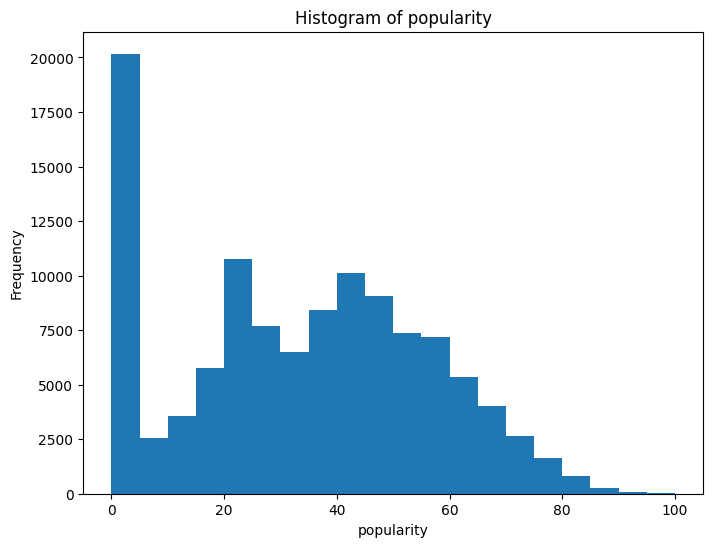

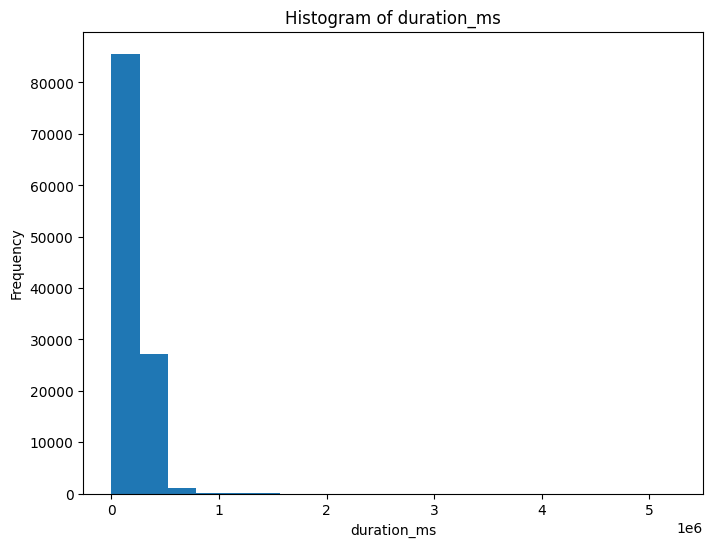

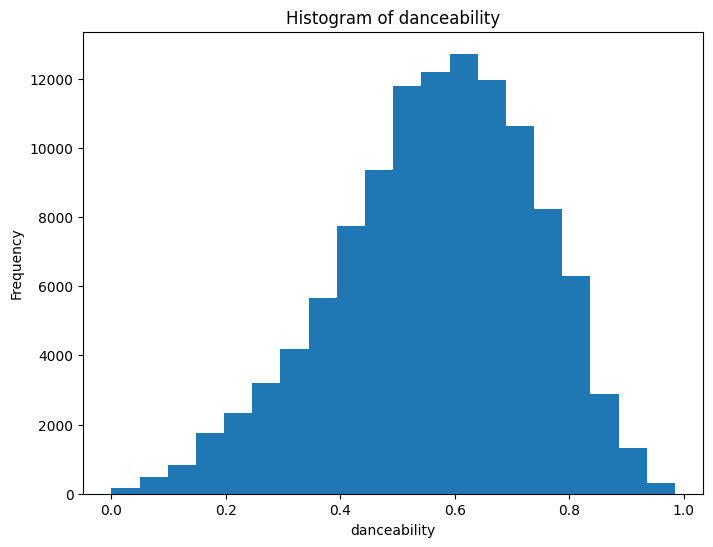

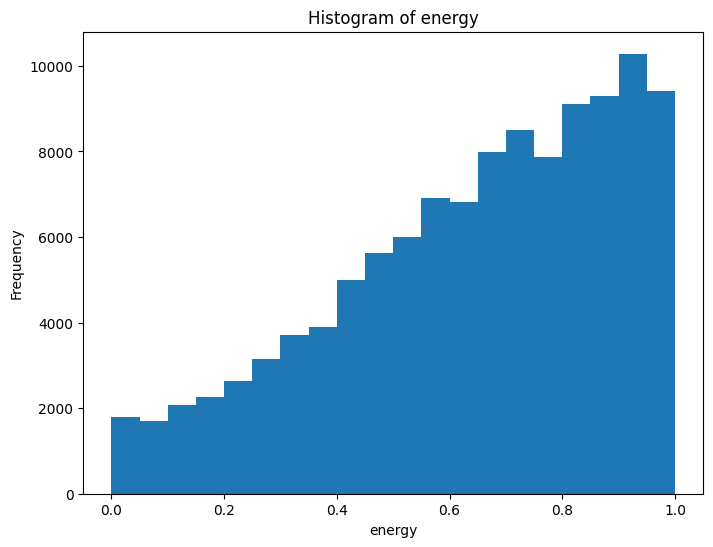

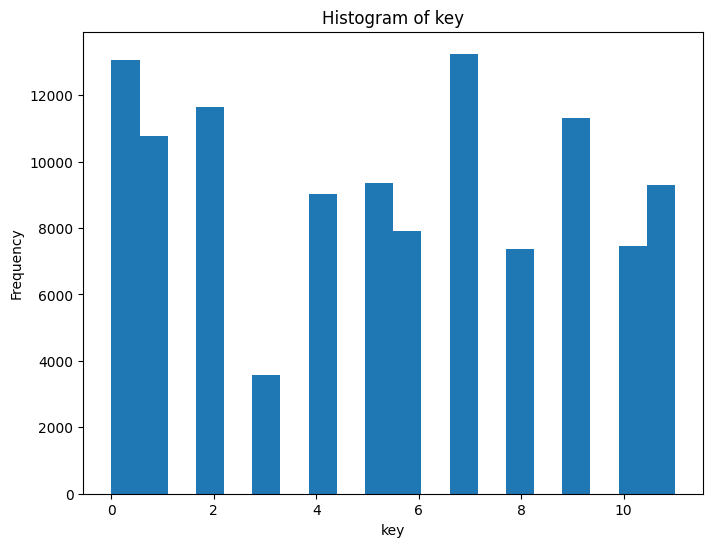

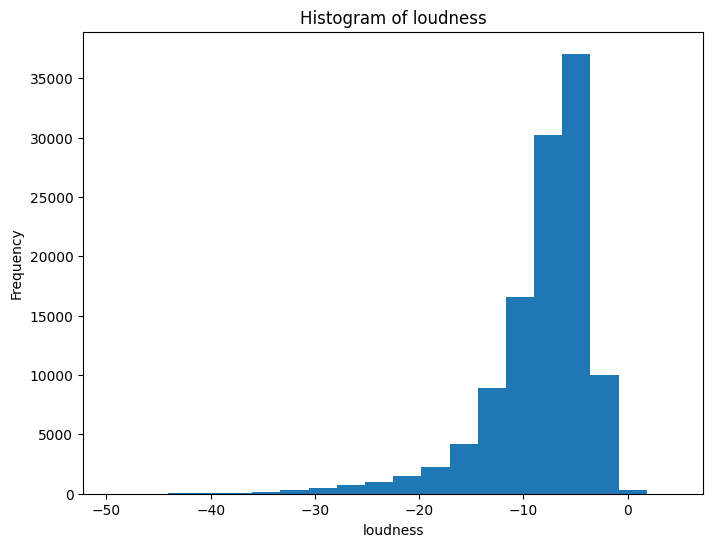

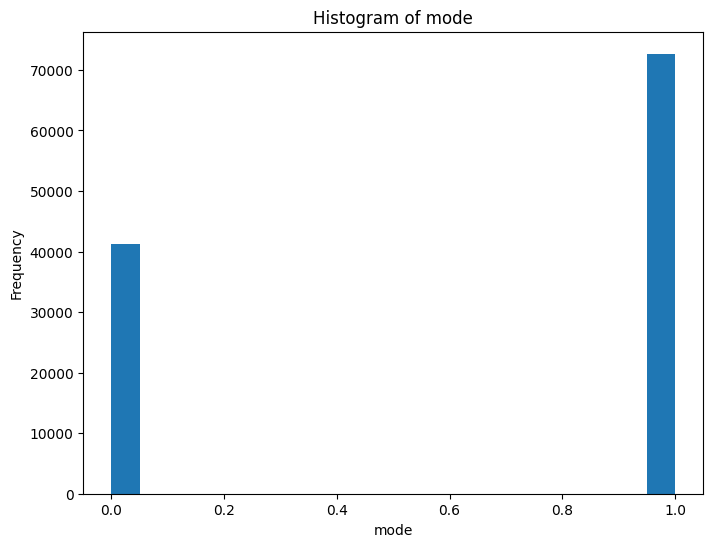

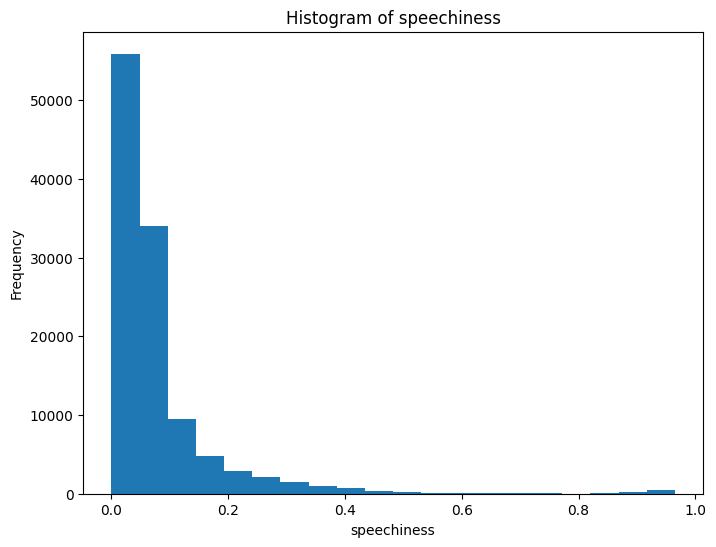

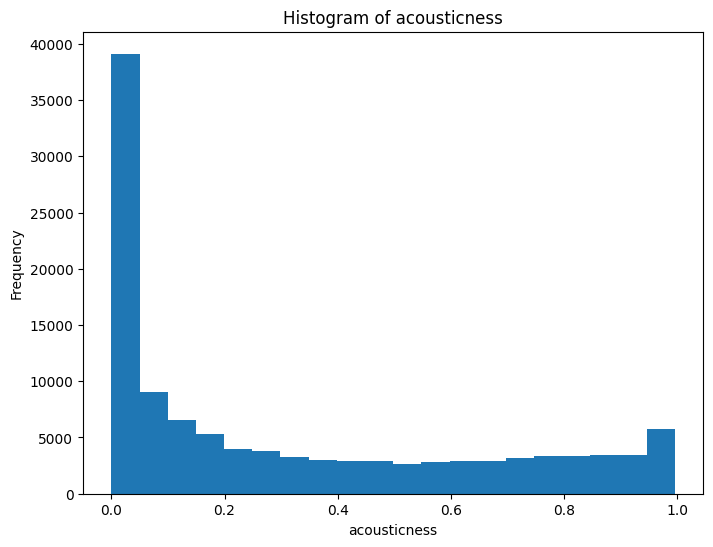

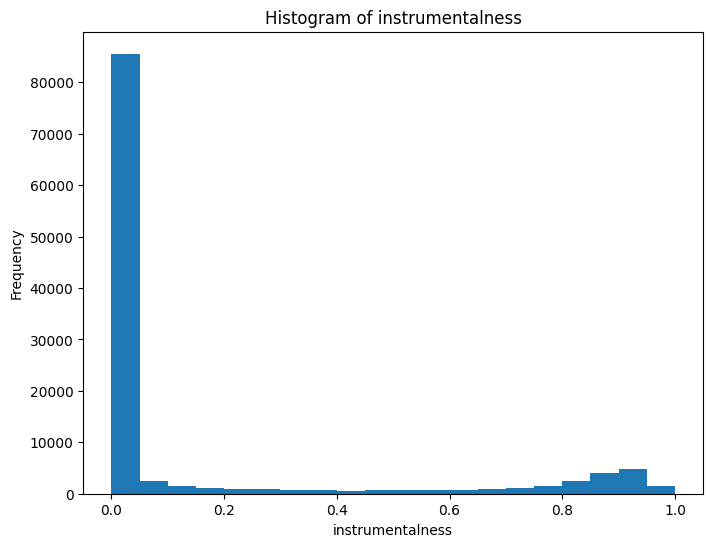

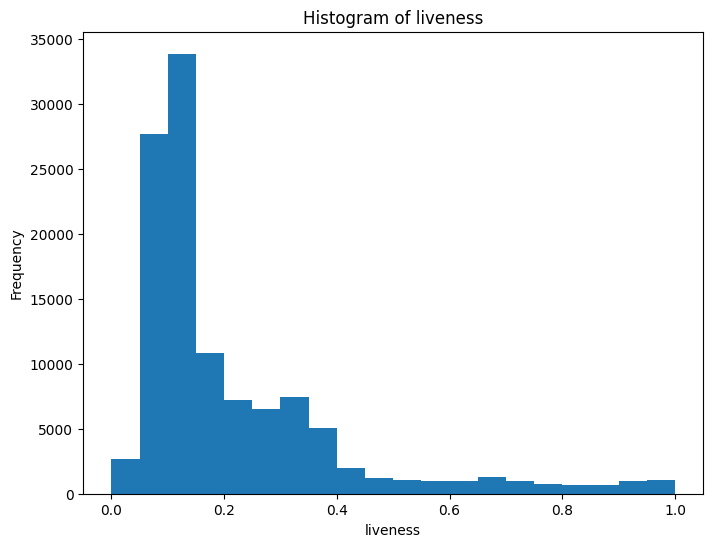

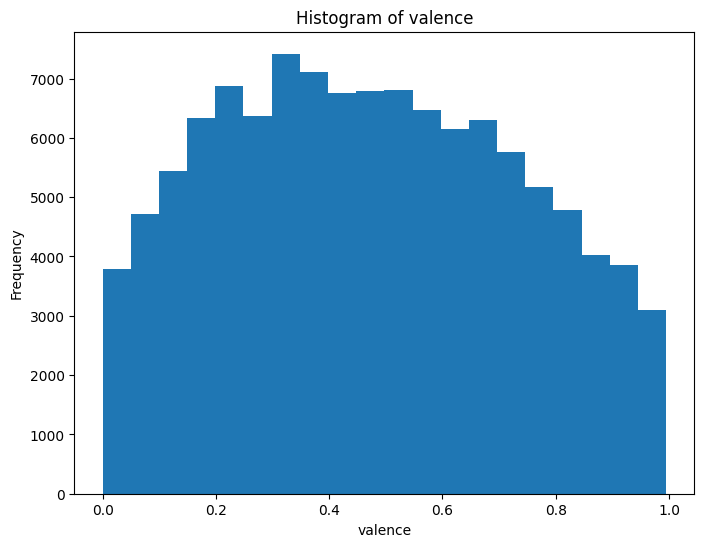

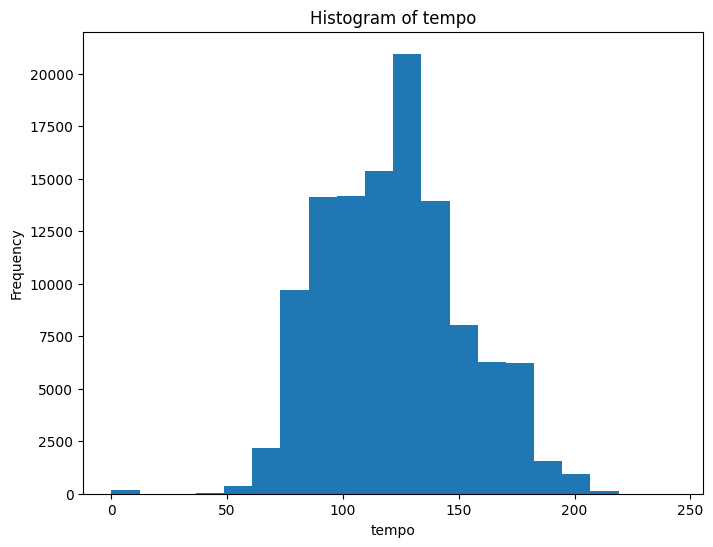

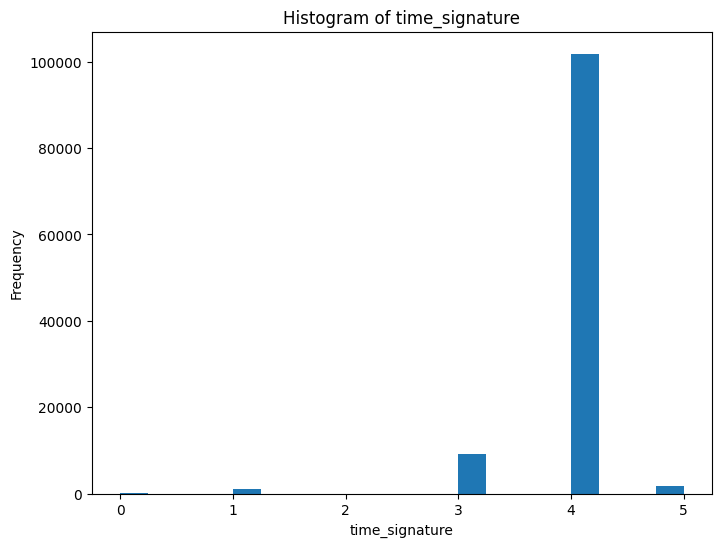

In [12]:
# Create histograms for numeric variables
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Create histograms for each numeric column
for col in numeric_cols.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.hist(df[col], bins=20)  # You can adjust the number of bins
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


In [13]:
# Check unique values of categorical variables
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
  print(f"Unique values for {col}: {df[col].unique()}")


Unique values for track_id: ['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']
Unique values for artists: ['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson;ZAYN' ...
 'Cuencos Tibetanos Sonidos Relajantes'
 'Bryan & Katie Torwalt;Brock Human' 'Jesus Culture']
Unique values for album_name: ['Comedy' 'Ghost (Acoustic)' 'To Begin Again' ...
 '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente'
 'Frecuencias Álmicas en 432hz (Solo Piano)' 'Revelation Songs']
Unique values for track_name: ['Comedy' 'Ghost - Acoustic' 'To Begin Again' ... 'Water Into Light'
 'Miss Perfumado' 'Barbincor']
Unique values for track_genre: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'danc

In [14]:
# Find the number of unique genres (should be 125)
unique_genres_count = df['track_genre'].nunique()
print(f"Number of unique genres: {unique_genres_count}")


Number of unique genres: 114


In [15]:
# Find the number of unique modes(should be 2)
unique_mode_count = df['mode'].nunique()
print(f"Number of unique mode: {unique_mode_count}")

Number of unique mode: 2


In [16]:
# Find the number of unique keys(should be 12)
unique_key_count = df['key'].nunique()
print(f"Number of key mode: {unique_key_count}")

Number of key mode: 12


In [17]:
# Check for missing values in each of the columns
for column in df.columns:
  missing_values = df[column].isnull().sum()
  print(f"'{column}':{missing_values}")


'Unnamed: 0':0
'track_id':0
'artists':1
'album_name':1
'track_name':1
'popularity':0
'duration_ms':0
'explicit':0
'danceability':0
'energy':0
'key':0
'loudness':0
'mode':0
'speechiness':0
'acousticness':0
'instrumentalness':0
'liveness':0
'valence':0
'tempo':0
'time_signature':0
'track_genre':0


In [18]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

print(rows_with_missing_values)


       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [19]:
# Look at the data types of each column
print(df.dtypes)


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [20]:
# Data Cleaning Function
def clean_data(df):
  df = df.drop('Unnamed: 0', axis=1, errors='ignore')
  df = df.dropna()
  return df


In [21]:
cleaned_df = clean_data(df)

In [22]:
# Checking the clean data
cleaned_df.head(10)

track_id                               artists  \
0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [23]:
cleaned_df.sample(10)

track_id                                   artists  \
62635   3TTkE5EJF6pkyZYvfv9tCm                                 Creep Hyp   
4619    3yXG9QHONVu3zOqj68evR4           Novo Amor;Ed Tullett;Lowswimmer   
59809   1uVGh2VWfTDvPQ9JTPmCRB                         From The Vastland   
34385   7x46YkKAwp3yZpaa72n5Mu                             The Lumineers   
41744   2sE9IexbGA2WwA4J6JaVw0                            New Model Army   
101123  3yDLFnWl3HvnkJmhlSpoaw  Traditional;Royal Philharmonic Orchestra   
176     0EKBV6GybPtALXUgWqWrym                            Brandi Carlile   
97982   0qaAoQ7At60PqNbga3Mhdj                             Eduardo Costa   
8866    5DIVWgTeJ2fPIxaY9e7ZKn                           Ella Fitzgerald   
100315  4qdciGWDHMCQrXz86KMt7q                                      Sumo   

                            album_name  \
62635                死ぬまで一生愛されてると思ってたよ   
4619                           Heiress   
59809                  Mar-Tiya-Khvara   
34385   The Lumineers (Deluxe Edition)   
41744                           Winter   
101123     Classical Christmas, Vol. 1   
176                          The Story   
97982                   Coração Aberto   
8866               Ella Sings Gershwin   
100315                    After Chabon   

                                            track_name  popularity  \
62635                                      バイト バイト バイト          38   
4619                                           Cavalry          46   
59809                                  Mar-Tiya-Khvara           3   
34385                                    Stubborn Love          68   
41744                                  Burn the Castle          21   
101123  The Twelve Days of Christmas (Remastered 2014)           0   
176                                          The Story          66   
97982                           Olhando Nos Teus Olhos          43   
8866                           I've Got A Crush On You          57   
100315                                 Percussion Baby          40   

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
62635        266499     False         0.626   0.706    2    -5.343     1   
4619         311853     False         0.275   0.401    3   -10.641     1   
59809        375500     False         0.273   0.923    8    -3.873     1   
34385        279000     False         0.596   0.544    0   -11.759     1   
41744        192478     False         0.367   0.904   11    -8.206     0   
101123       261635     False         0.433   0.470   11   -11.853     1   
176          238493     False         0.544   0.500   11    -8.253     1   
97982        228646     False         0.690   0.688    7    -5.285     1   
8866         196440     False         0.455   0.106    2   -14.086     1   
100315       226133     False         0.890   0.543   11   -10.976     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
62635        0.0303      0.172000          0.000000    0.1050   0.5000   
4619         0.0349      0.800000          0.009030    0.1240   0.1860   
59809        0.0955      0.000069          0.003300    0.0877   0.0416   
34385        0.0362      0.604000          0.017000    0.2620   0.2620   
41744        0.0629      0.000262          0.201000    0.0564   0.4520   
101123       0.0704      0.945000          0.000002    0.4690   0.3190   
176          0.0260      0.032500          0.000004    0.1090   0.1770   
97982        0.0463      0.695000          0.000000    0.0872   0.7280   
8866         0.0422      0.986000          0.000000    0.1220   0.2580   
100315       0.0948      0.106000          0.159000    0.0719   0.2840   

          tempo  time_signature track_genre  
62635   128.011               4       j-pop  
4619    147.662               4     ambient  
59809   119.302               4     iranian  
34385   115.022               4        folk  
41744   143.333               4        goth  
101123   71.184        

In [24]:
cleaned_df.shape

(113999, 20)

In [25]:
#Save clean df to colab for future use
cleaned_df.to_csv('clean_spotify_data.csv', index=False)

# Stage 2: Exploratory Data Analysis

In [26]:
# Calculate summary statistics for numeric columns
summary_stats = cleaned_df.describe()
print(summary_stats)

          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       

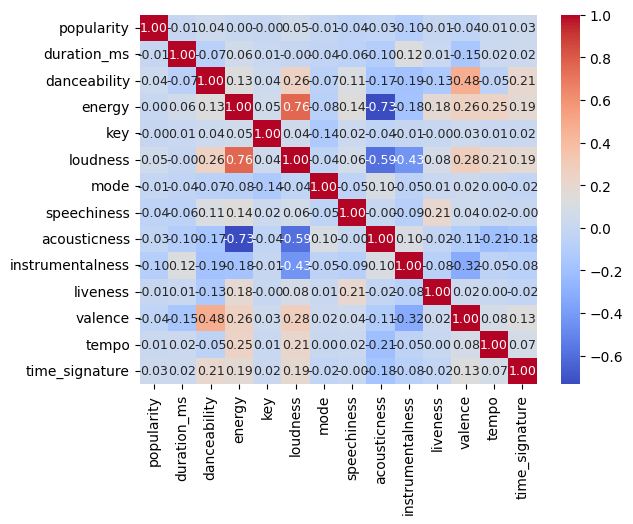

In [27]:
# Correlation matrix
numeric_cols = cleaned_df.select_dtypes(include=['number'])
# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",annot_kws={"size": 9})
plt.show()

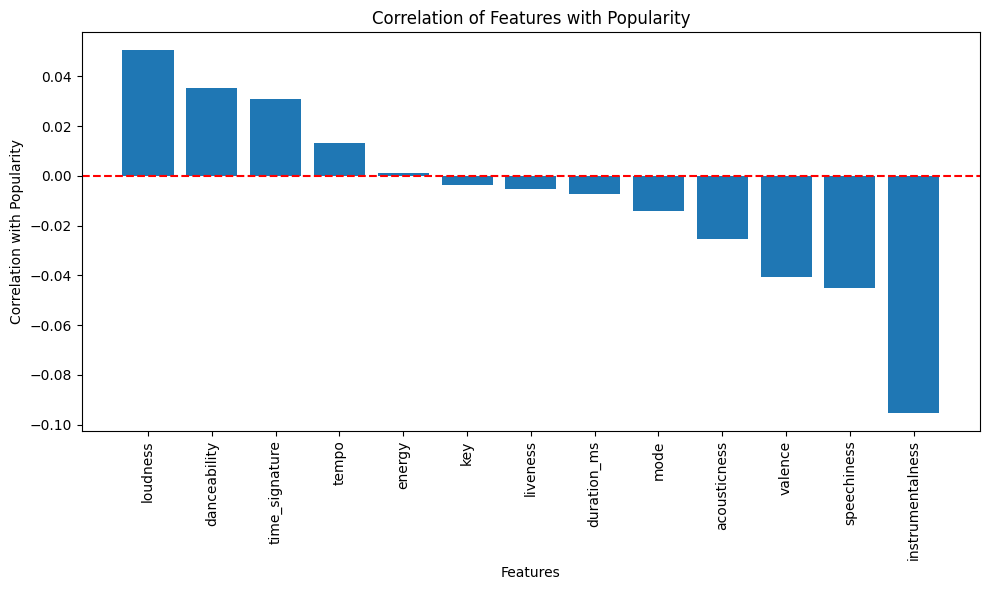

In [28]:
# Calculate the correlation between numerical features and popularity
correlation_with_popularity = numeric_cols.corr()['popularity'].sort_values(ascending=False)

# Remove the correlation with itself (popularity with popularity)
correlation_with_popularity = correlation_with_popularity.drop('popularity')

# Create a bar plot of the correlation values
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_popularity.index, correlation_with_popularity.values)
plt.axhline(y=0, color='red', linestyle='--')  # Add a line at y=0
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Correlation with Popularity')
plt.title('Correlation of Features with Popularity')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

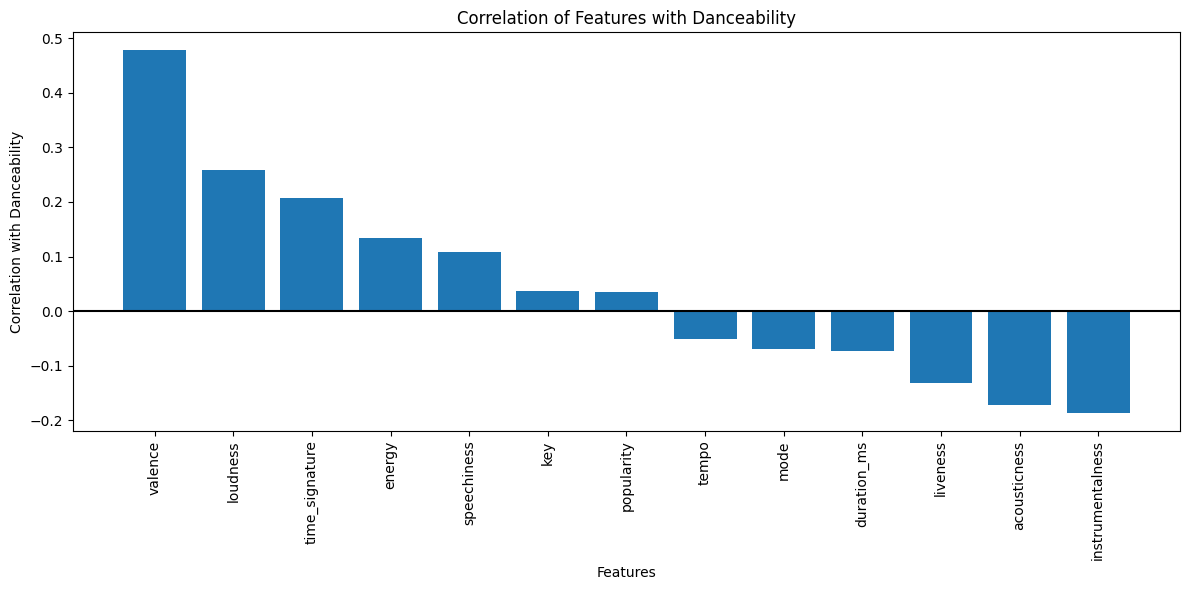

In [29]:

# Calculate correlations between numeric features and 'danceability'
correlation_with_danceability = numeric_cols.corr()['danceability'].sort_values(ascending=False)

# Remove the correlation with 'danceability' itself
correlation_with_danceability = correlation_with_danceability.drop('danceability')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(correlation_with_danceability.index, correlation_with_danceability.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Danceability')
plt.title('Correlation of Features with Danceability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=0, color='black', linestyle='-')  # Add a line at y=0
plt.tight_layout()
plt.show()

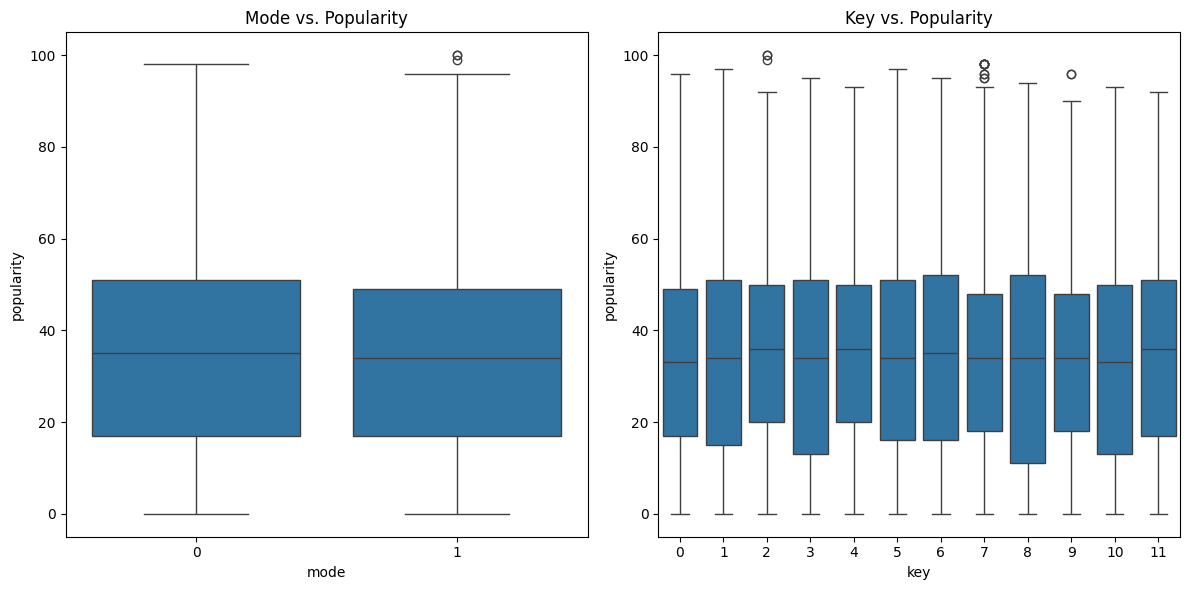

In [30]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for mode vs popularity
sns.boxplot(x='mode', y='popularity', data=cleaned_df, ax=axes[0])
axes[0].set_title('Mode vs. Popularity')

# Box plot for key vs popularity
sns.boxplot(x='key', y='popularity', data=cleaned_df, ax=axes[1])
axes[1].set_title('Key vs. Popularity')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

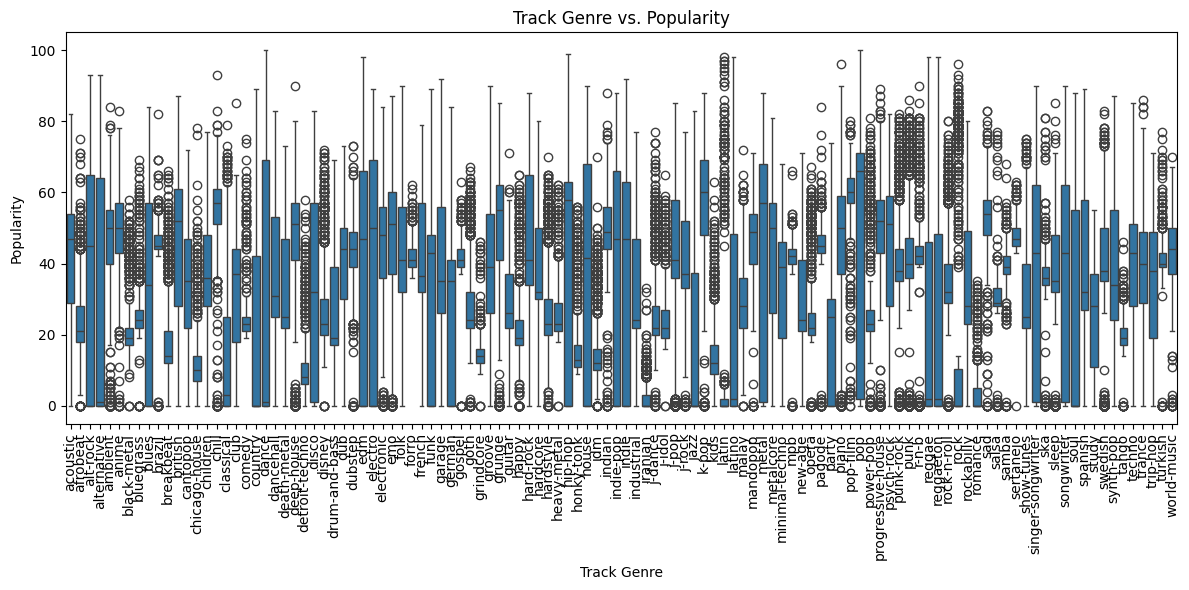

In [31]:
# Create a box plot of track genre vs popularity
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='popularity', data=cleaned_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.title('Track Genre vs. Popularity')
plt.tight_layout()
plt.show()

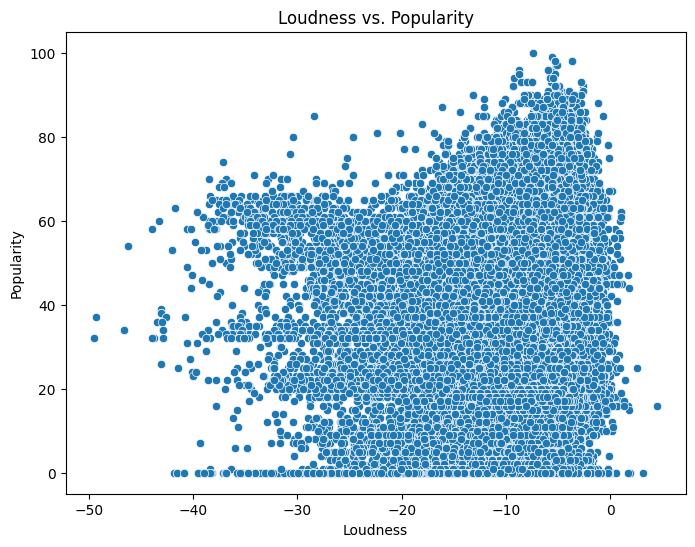

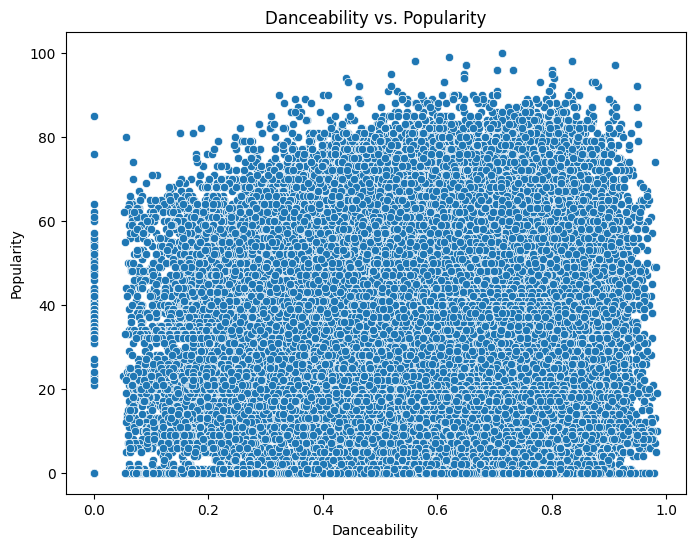

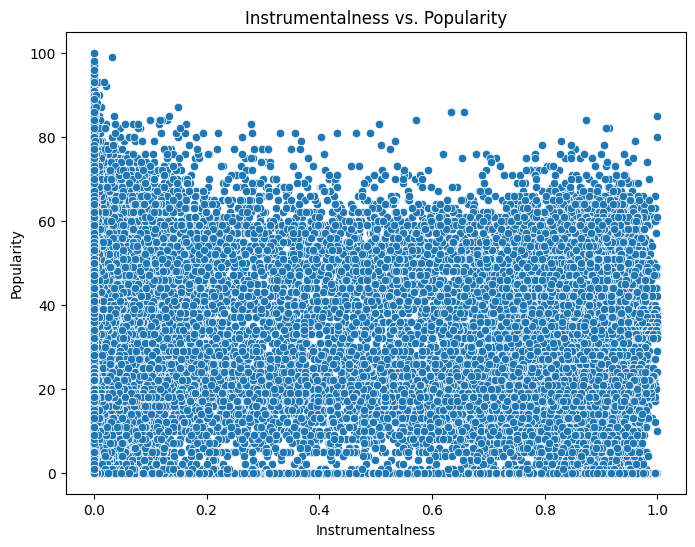

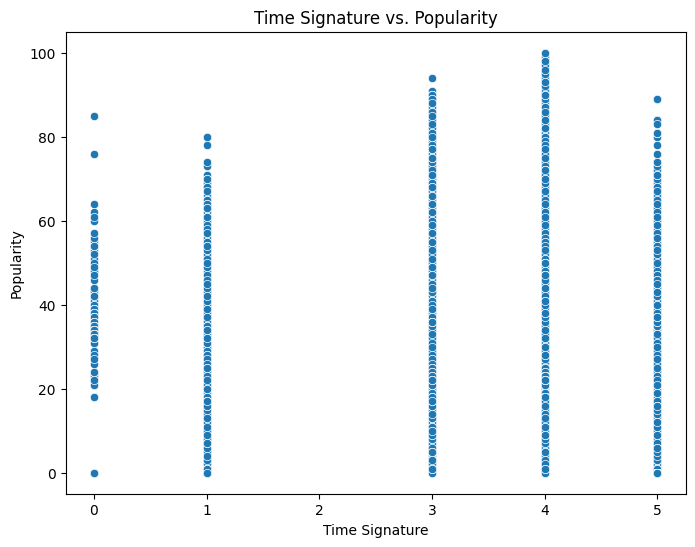

In [32]:
# Scatter plot for loudness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='popularity', data=cleaned_df)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Loudness vs. Popularity')
plt.show()

# Scatter plot for danceability vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=cleaned_df)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs. Popularity')
plt.show()

# Scatter plot for instrumentalness vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=cleaned_df)
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Instrumentalness vs. Popularity')
plt.show()

# Scatter plot for time_signature vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_signature', y='popularity', data=cleaned_df)
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.title('Time Signature vs. Popularity')
plt.show()

In [33]:
# Looking at danceability

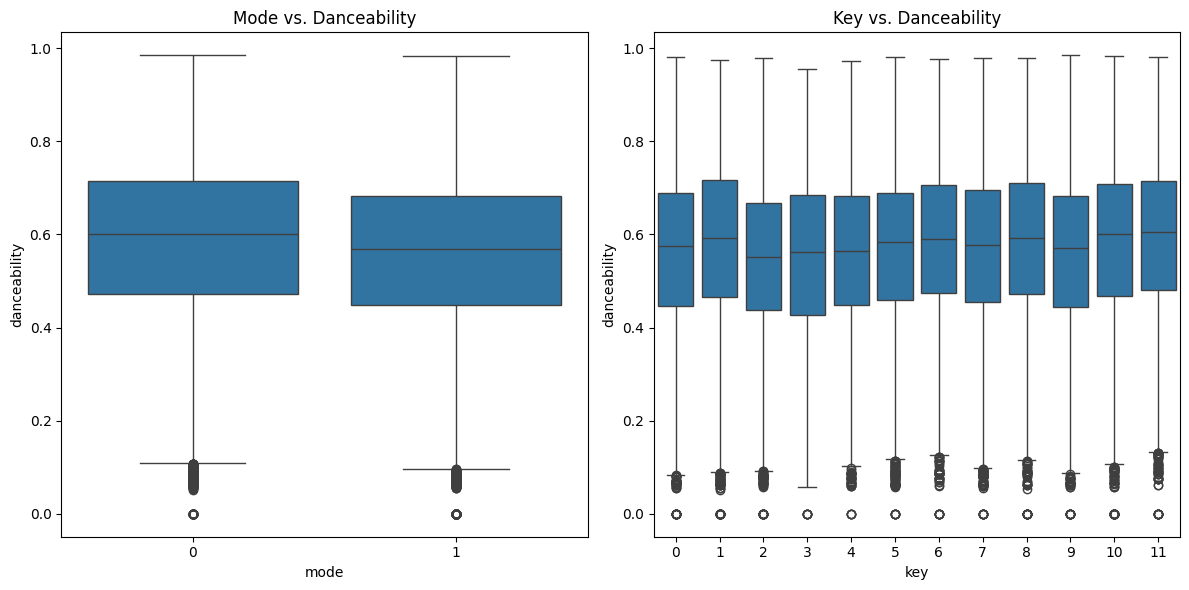

In [34]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for mode vs danceability
sns.boxplot(x='mode', y='danceability', data=cleaned_df, ax=axes[0])
axes[0].set_title('Mode vs. Danceability')

# Box plot for key vs danceability
sns.boxplot(x='key', y='danceability', data=cleaned_df, ax=axes[1])
axes[1].set_title('Key vs. Danceability')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

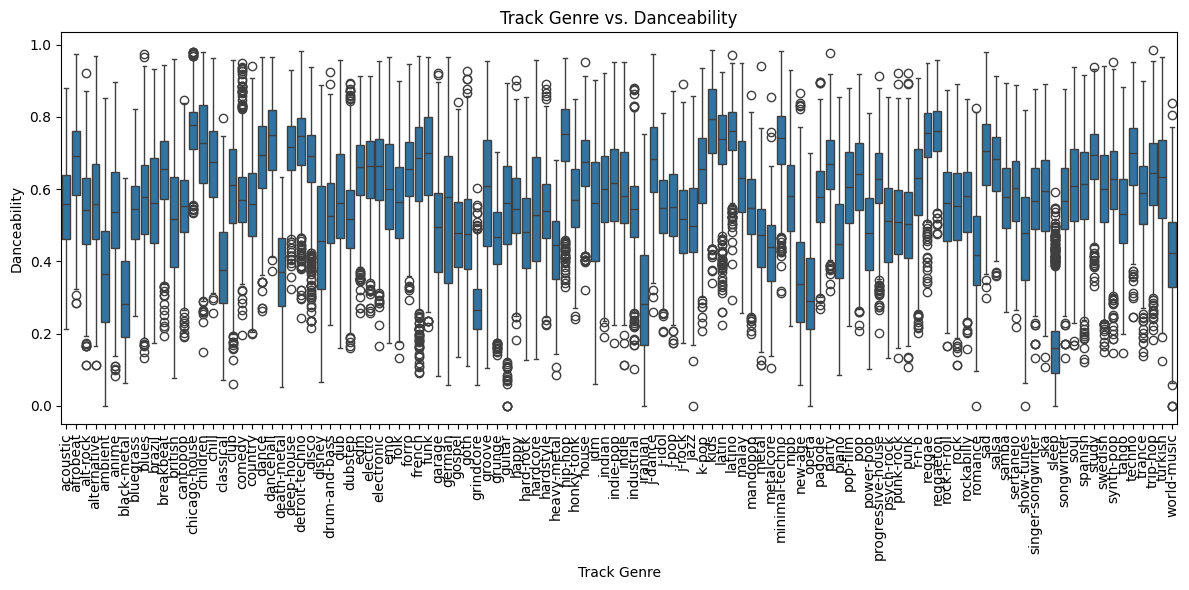

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='track_genre', y='danceability', data=cleaned_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Track Genre')
plt.ylabel('Danceability')
plt.title('Track Genre vs. Danceability')
plt.tight_layout()
plt.show()

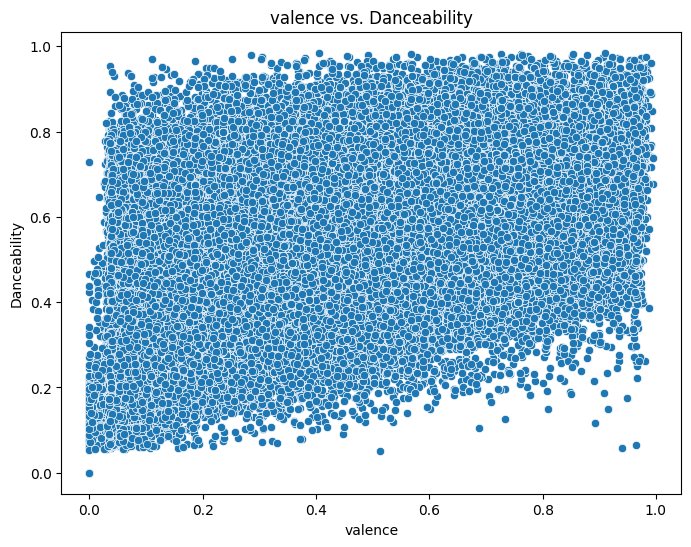

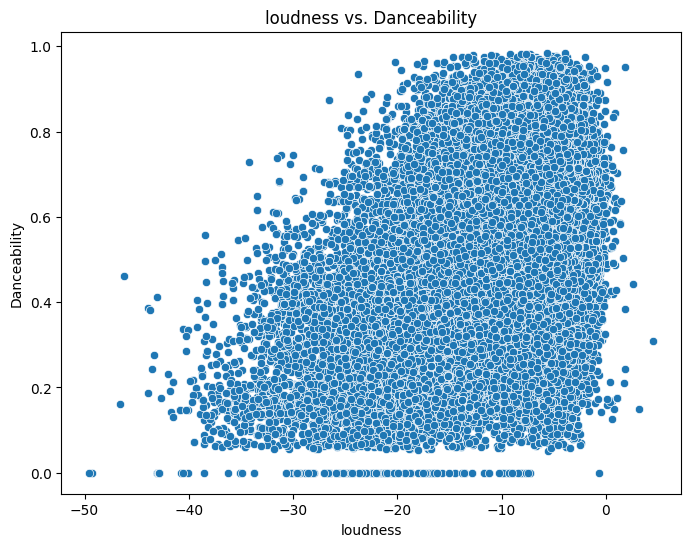

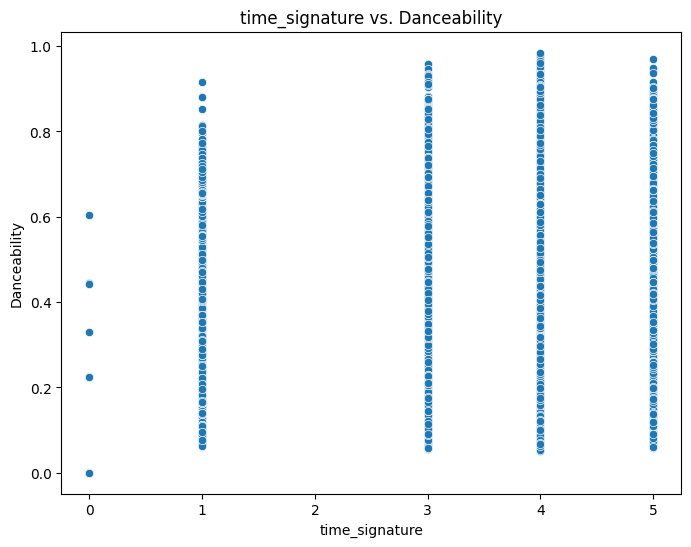

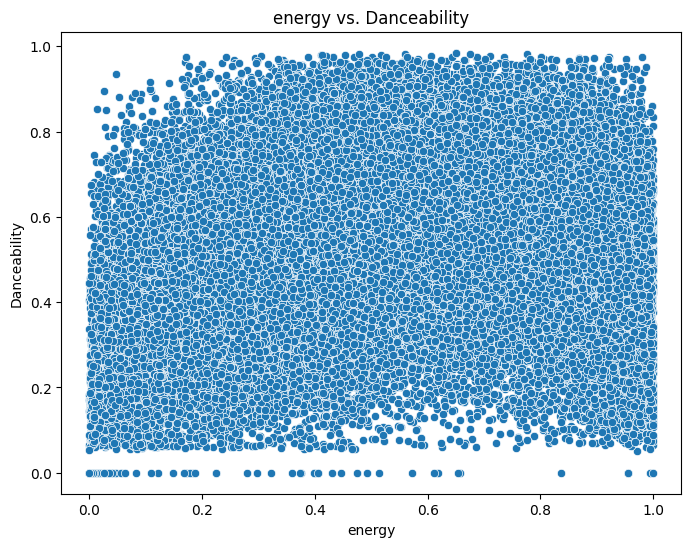

In [36]:
# prompt: scatter plots of valence, loudness, time_signature, energy (x) vs danceability(y)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_df' is your DataFrame

# Create scatter plots for valence, loudness, time_signature, and energy vs. danceability
features_to_plot = ['valence', 'loudness', 'time_signature', 'energy']

for feature in features_to_plot:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature, y='danceability', data=cleaned_df)
  plt.xlabel(feature)
  plt.ylabel('Danceability')
  plt.title(f'{feature} vs. Danceability')
  plt.show()

In [43]:
# split data
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)


# Stage 3: Linear Regression

Simple Linear Regression

In [37]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.9/188.9 kB 11.4 MB/s eta 0:00:00


In [38]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression

In [44]:
# LAD
lad_pop_fit = LADRegression()
lad_pop_fit.fit(X=np.array(train_df['popularity']).reshape(-1, 1), y=train_df['danceability'])

LADRegression()

In [45]:
# LS
ls_pop_fit = LinearRegression()
ls_pop_fit.fit(X=np.array(train_df['popularity']).reshape(-1, 1), y=train_df['danceability'])

LinearRegression()

In [46]:
# Add to scatter plot of popularity vs. danceability
fig = px.scatter(train_df, x='popularity', y='danceability', title='Popularity vs. Danceability')
fig.add_trace(
    go.Scatter(
        x=train_df['popularity'],
        y=ls_pop_fit.intercept_ + train_df['popularity'] * lad_pop_fit.coef_[0],
        mode='lines',
        name='LAD',
        line={'dash': 'dash',
              'color': 'black'})
)